In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
from scipy import stats


In [2]:
participant_data = pd.read_csv("Demographics Information - Human Participants.csv")
print(participant_data.shape)
participant_data.head()

(175, 25)


,Study Name/Number,Race,Race Present,Ethnicity,Ethnicity Present,Study sample size,Sex Present,Male,Female,Unknown / Not Reported,...,Max Age,Country/Region,Location,Pre-existing conditions and/or Symptoms,Instruments used,Socioeconomic Status,Data Collected (differnent levels of),Date Study was Conducted/Published,Date Study Posted on PhysioNet,Field
0,A large scale 12-lead electrocardiogram databa...,X,0,X,0,"45, 152 patients",1,X,X,NaN,...,NaN,China,"Chapman University, Shaoxing People's Hospital...",Includes information about pre-existing condit...,GE MUSE ECG System,X,NaN,NaN,NaN,cardiac_electrophysiology
1,A multi-camera and multimodal dataset for post...,X,0,X,0,14,1,10,4,NaN,...,30.00,Portugal,Portugal (University of Minho),No clinical history of any abnormalities,MVN BIOMECH,X,"walking straight in a corridor, turning right ...",NaN,NaN,gait/balance/motion
2,A Pressure Map Dataset for In-bed Posture Clas...,X,0,X,0,Experiment 1: 13 participants Ex...,0,X,X,NaN,...,34.00,USA,Texas (University of Texas at Dallas),X,Experiment 1: Vista Medical FSA SoftFlex 2048 ...,X,in-bed posture pressure data,NaN,NaN,other
3,A Wearable Exam Stress Dataset for Predicting ...,X,0,X,0,10,0,X,X,NaN,...,NaN,USA,Texas (University of Houston,X,Empatica E4 wristband,NaN,"electrodermal activity, heart rate, blood vol...",NaN,NaN,multi_parameter
4,Abdominal and Direct Fetal ECG Database: Multi...,X,0,X,0,5 women in labor were analyzed,0,X,X,NaN,...,0.79,Poland,Department of Obstetrics at the Medical Univer...,Women in labor,"KOMPOREL System (ITAM Institute, Zabrze, Polan...",X,NaN,NaN,NaN,cardiac_electrophysiology


In [22]:
data = participant_data[['Race Present', 'Ethnicity Present', 'Sex Present', 'Age Present']]
data = data.rename(columns={"Race Present": "Race", "Ethnicity Present": "Ethn.", "Age Present": "Age", "Sex Present": "Gender"})
data.head()
sums = data.sum()
print(sums)


Race       10
Ethn.       6
Gender    131
Age       126
dtype: int64


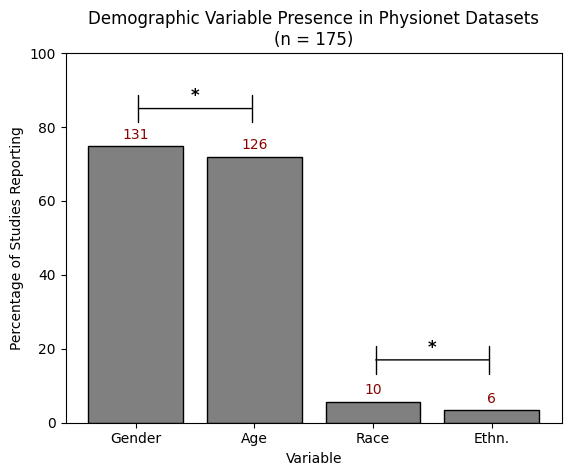

In [25]:
def addlabels(x, y, c):
    for i in range(len(x)):
        plt.text(i, y[i]+2, c[i], ha='center', color='darkred')  # choose a color so the number above the bar is not confused with the y-axis labels

simple = {'Gender': sums[2] / 1.75, 'Age': sums[3] / 1.75, 'Race': sums[0] / 1.75, 'Ethn.': sums[1] / 1.75}

vars = list(simple.keys())
values = list(simple.values())

fig, ax = plt.subplots()
plt.bar(vars, values, color='grey', edgecolor='black')
plt.title('Demographic Variable Presence in Physionet Datasets\n(n = 175)')
plt.ylabel("Percentage of Studies Reporting")
plt.xlabel("Variable")
plt.ylim(0, 100)

counts = [sums[2], sums[3], sums[0], sums[1]]
addlabels(vars, values, counts)

plt.annotate('*', xy=(.5, 87), ha='center', color='black', fontsize=12, weight='bold')
plt.annotate("", xy=(0, 85), xytext=(1, 85), arrowprops=dict(arrowstyle='|-|, widthB=1.0', lw=1.0, color='black'))

plt.annotate('*', xy=(2.5, 19), ha='center', color='black', fontsize=12, weight='bold')
plt.annotate("", xy=(2, 17), xytext=(3, 17), arrowprops=dict(arrowstyle='|-|, widthB=1.0', lw=1.0, color='black'))

plt.show()


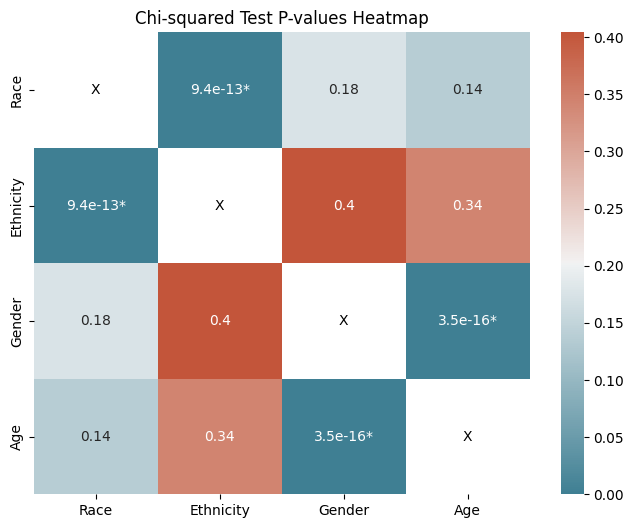

In [37]:
p_values = [
    [None, 9.4164e-13, 0.17625, 0.13602],
    [9.4164e-13, None, 0.40433, 0.34369],
    [0.17625, 0.40433, None, 3.4516e-16],
    [0.13602, 0.34369, 3.4516e-16, None]
]
variable_names = ['Race', 'Ethnicity', 'Gender', 'Age']

p_values_df = pd.DataFrame(p_values, index=variable_names, columns=variable_names)

plt.figure(figsize=(8, 6))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

def format_annotation(val):
    if val is not None:
        if val < 0.0083:
            return f'{val:.2g}*'
        else:
            return f'{val:.2g}'
    return ''

annot_df = p_values_df.applymap(format_annotation)

sns.heatmap(p_values_df, annot=annot_df, cmap=cmap, fmt='', cbar=True, annot_kws={'fontsize': 10})

for i, label in enumerate(p_values_df.columns):
    plt.text(i + 0.5, i + 0.5, 'X', ha='center', va='center', fontsize=10)

plt.title('Chi-squared Test P-values Heatmap')
plt.show()


In [5]:
# age_data = pd.read_csv("Demographics Information - Age.csv")
age_data = participant_data[['Age Present', 'Average Age', 'Min Age', 'Max Age', 'Field']]
print(age_data.shape)
age_data.head()



(175, 5)


,Age Present,Average Age,Min Age,Max Age,Field
0,1,NaN,NaN,NaN,cardiac_electrophysiology
1,1,25.4,18.00,30.00,gait/balance/motion
2,1,26.9,19.00,34.00,other
3,0,NaN,NaN,NaN,multi_parameter
4,1,NaN,0.69,0.79,cardiac_electrophysiology


In [6]:
no_outlier = age_data.drop(age_data.index[123])
avg_age = age_data["Average Age"].dropna()
avg_age.head()
print(avg_age.size)
# print(avg_age.mean())

68


In [7]:
cleaned = age_data
## .dropna(subset=['Ma Age', 'Total N'])
min_age = cleaned["Min Age"].dropna()
min_age.head()
# print(min_age.size)
print(min_age.mean())

23.949589743584617


In [8]:
## change 'Average Age' to 'Min Age' or 'Max Age' for min/max age histograms and density plots

maxAvg = cleaned.max(axis=0)['Average Age']
minAvg = cleaned.min(axis=0)['Average Age']
avgBins = (maxAvg-minAvg)
print(maxAvg, minAvg, avgBins)
print(cleaned['Average Age'].mean())
print(cleaned['Average Age'].median())

78.36 6.1 72.26
38.25492647058824
30.4


In [9]:
maxMax = cleaned.max(axis=0)['Max Age']
minMax = cleaned.min(axis=0)['Max Age']
maxBins = (maxMax-minMax)
print(maxMax, minMax, maxBins)
print(cleaned['Max Age'].mean())
print(cleaned['Max Age'].median())

99.1 0.79 98.30999999999999
54.69005291
53.0


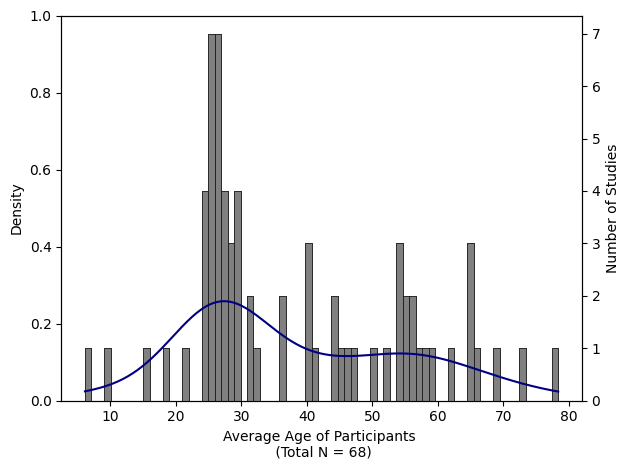

In [10]:
fig, ax = plt.subplots()
plt.xlabel("Average Age of Participants \n (Total N = 68)")
plt.ylabel("Density")
ax2 = ax.twinx()
sns.histplot(avg_age, kde=True, ax=ax2, bins = 73, color = 'navy')
plt.hist(avg_age, color = 'grey', bins = 73, edgecolor = 'black', linewidth = .4)
plt.ylabel("Number of Studies")
plt.tight_layout()
plt.show()


In [11]:
ci_avg = stats.t.interval(confidence=0.05, df=len(avg_age) - 1, loc=np.mean(avg_age), scale=stats.sem(avg_age))
print(ci_avg)

(38.12903941789601, 38.38081352328048)


In [12]:
ci_med = stats.t.interval(confidence=0.05, df=len(avg_age) - 1, loc=np.median(avg_age), scale=stats.sem(avg_age))
print(ci_med)

(30.274112947307763, 30.525887052692234)
